In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [3]:
df=pd.read_csv("/content/used_device_data.csv")

In [4]:
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [6]:
df.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


## **Data** **Preprocessing**

 1) Find the columns which include NaN

In [7]:
df.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

2) Drop the rows which include NaN

In [8]:
df=df.dropna()

3) Find the duplicated rows

In [9]:
duplicated_rows=df[df.duplicated()]
print(f"No of Duplicated Rows Present in the dataset:{duplicated_rows.shape[0]}")

No of Duplicated Rows Present in the dataset:0


4) Find the numeric columns

In [10]:
num_feature=[feature for feature in df.columns if df[feature].dtype!='O' ]
print(num_feature)

['screen_size', 'rear_camera_mp', 'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'normalized_used_price', 'normalized_new_price']


Find the categorical columns

In [11]:
cat_feature=[feature for feature in df.columns if df[feature].dtype=='O' ]
print(cat_feature)

['device_brand', 'os', '4g', '5g']


## Exploratory Data Analysis (EDA)

box plot of numeric columns

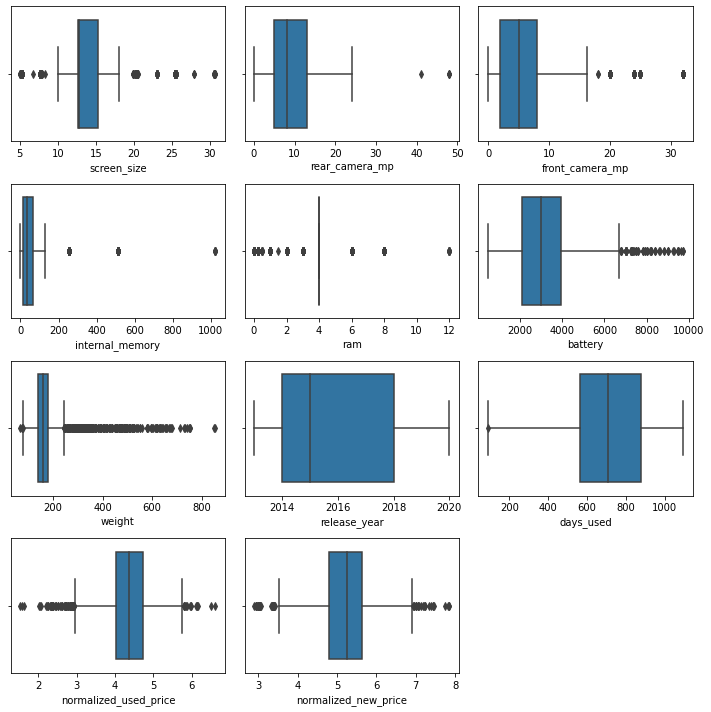

In [12]:
fig=plt.figure(figsize=(10,10))

for i in range(len(num_feature)):
  plt.subplot(4,3,i+1)
  sns.boxplot(data=df,x=df[num_feature[i]])

plt.tight_layout()
plt.show()

In [13]:
# There seem to be  some outliers in some numeric columns

2) Kernel density estimation by Kdeplot of the numeric columns

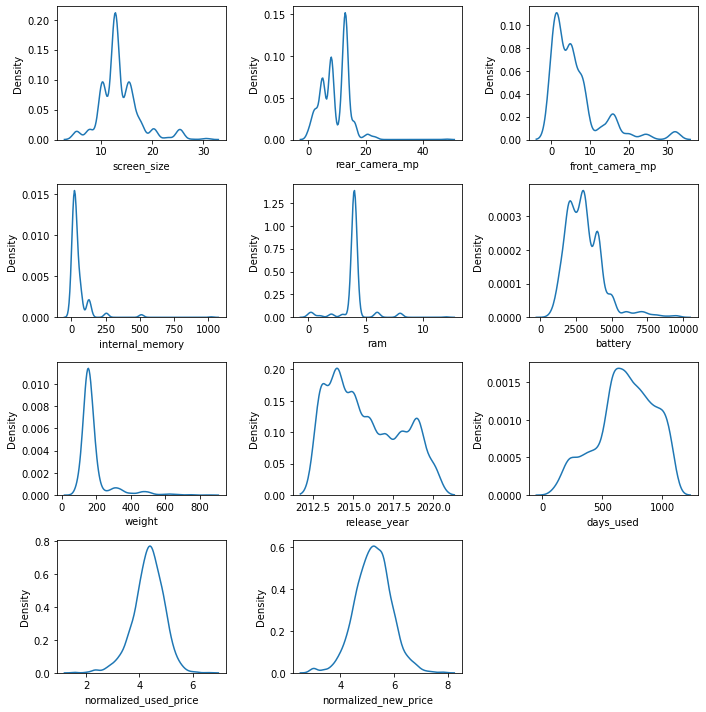

In [14]:
fig=plt.figure(figsize=(10,10))
for i in range(len(num_feature)):
  plt.subplot(4,3,i+1)
  sns.kdeplot(data=df,x=df[num_feature[i]])

plt.tight_layout()
plt.show()

In [15]:
# There seem to be non-normal distributions in the numeric columns except in normalized used price and normalized new price

3) Kernel density estimation by Kdeplot of the numeric columns and 'normalized_used_price'

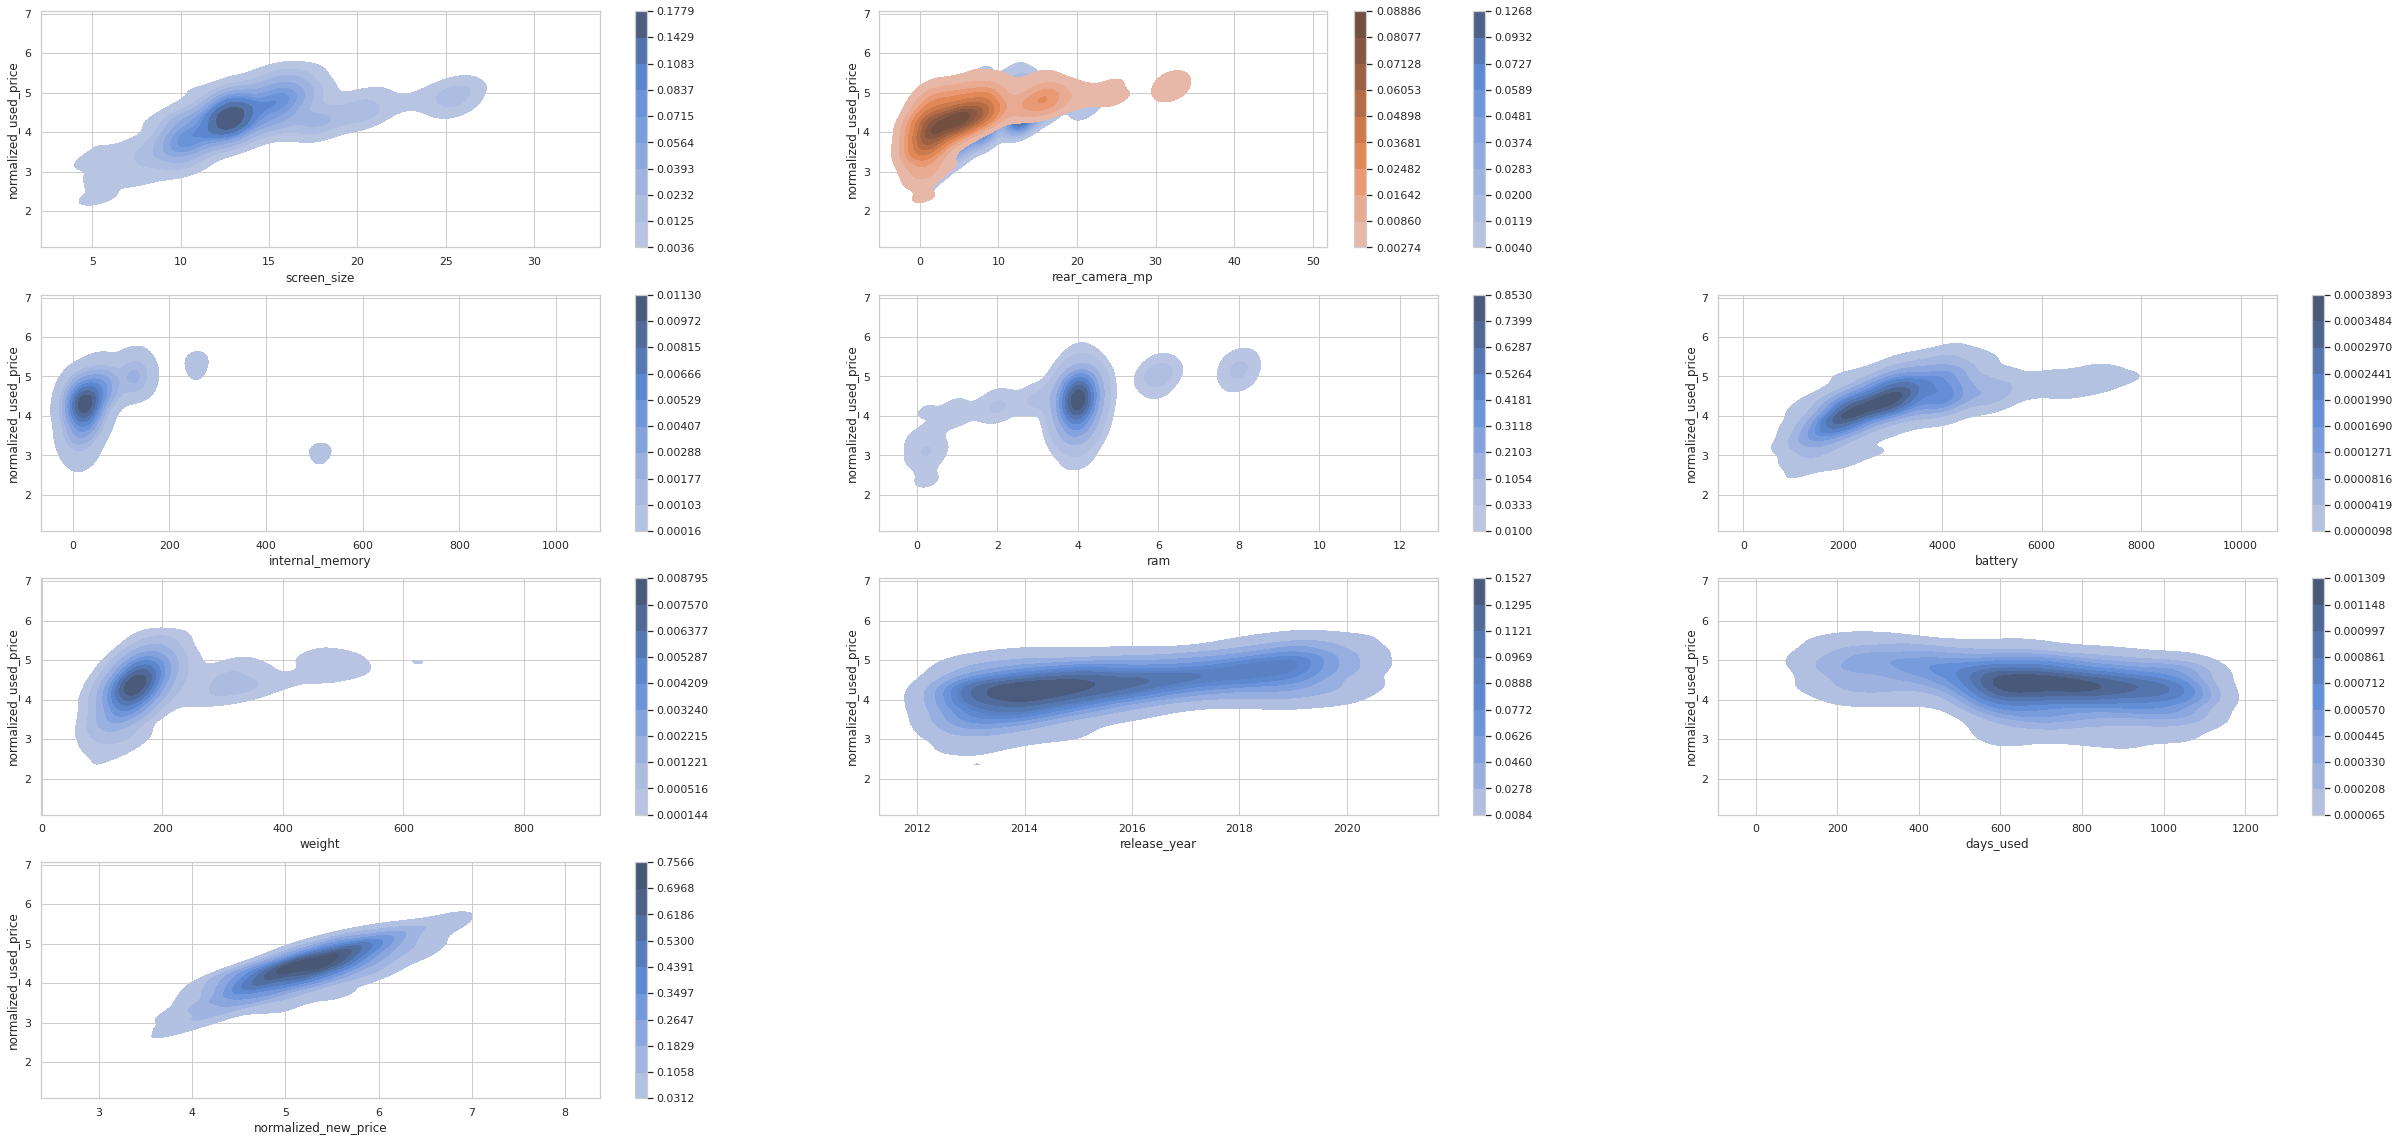

In [17]:
sns.set(style="whitegrid")
fig=plt.figure(figsize=(24,20))
fig.subplots_adjust(right=1.5)


plt.subplot(4,3,1)
sns.kdeplot(df['screen_size'],df['normalized_used_price'],fill=True,cbar=True)

plt.subplot(4, 3, 2)
sns.kdeplot(df['rear_camera_mp'],df['normalized_used_price'],fill=True,cbar=True)


plt.subplot(4, 3, 2)
sns.kdeplot(df['front_camera_mp'],df['normalized_used_price'],fill=True,cbar=True)

plt.subplot(4, 3, 4)
sns.kdeplot(df['internal_memory'],df['normalized_used_price'],fill=True,cbar=True)

plt.subplot(4, 3, 5)
sns.kdeplot(df['ram'],df['normalized_used_price'],fill=True,cbar=True)

plt.subplot(4, 3, 6)
sns.kdeplot(df['battery'],df['normalized_used_price'],fill=True,cbar=True)

plt.subplot(4, 3, 7)
sns.kdeplot(df['weight'],df['normalized_used_price'],fill=True,cbar=True)

plt.subplot(4, 3, 8)
sns.kdeplot(df['release_year'],df['normalized_used_price'],fill=True,cbar=True)


plt.subplot(4, 3, 9)
sns.kdeplot(df['days_used'],df['normalized_used_price'],fill=True,cbar=True)

plt.subplot(4, 3, 10)
sns.kdeplot(df['normalized_new_price'],df['normalized_used_price'],fill=True,cbar=True)

plt.show()


In [18]:
# There seem to be some concentration between function, for example screen_size, rear_camera_mp, front_camera_mp, internal_memory, ram and weight, and 'normalizeed_used_price'

4) Correlation between the numeric columns and 'normalized_used_price'

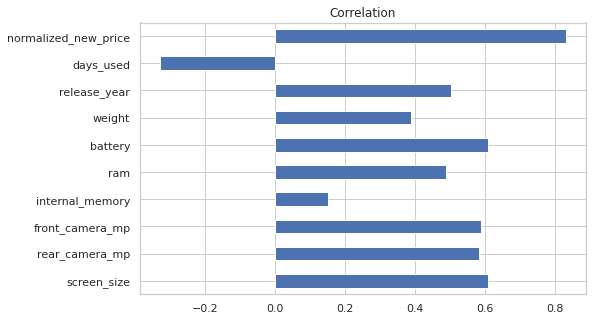

In [19]:
plt.figure(figsize=(8,5))
X=df.drop('normalized_used_price',axis=1)
X.corr(method='spearman')
X.corrwith(df['normalized_used_price']).plot(kind='barh',title='Correlation')
plt.show()

In numeric columns, 'normalized_used_price' have strong correlation with

normalized_new_price >0.8




battery >0.6
screen_size >0.6
front_camera_mp >0.5
rear_camera_mp >0.5





## **Feature Engineering**

In [20]:
# 1) Remove outliers

In [21]:
# Setting"internal_memory" in 99.9%

In [22]:
q1=df["internal_memory"].quantile(0.999)

In [23]:
df=df[df["internal_memory"]<q1]

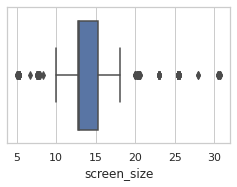

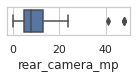

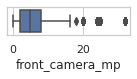

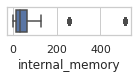

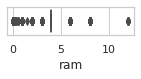

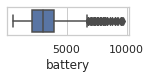

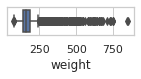

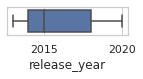

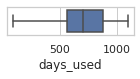

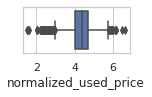

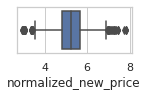

In [24]:
fig=plt.figure(figsize=(10,10))

for i in range(len(num_feature)):
  plt.subplot(4,3,i+1)
  sns.boxplot(data=df,x=df[num_feature[i]])

  plt.tight_layout()
  plt.show()

In [25]:
# convert categorical columns to numeric

In [26]:
df=pd.get_dummies(df)

In [27]:
df.head()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,...,device_brand_Xiaomi,device_brand_ZTE,os_Android,os_Others,os_Windows,os_iOS,4g_no,4g_yes,5g_no,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,...,0,0,1,0,0,0,0,1,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,...,0,0,1,0,0,0,0,1,0,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,...,0,0,1,0,0,0,0,1,0,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,...,0,0,1,0,0,0,0,1,0,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,...,0,0,1,0,0,0,0,1,1,0


In [28]:
# 3) Distplot and Q_Q plot of num_feature

Q-Q plot shows the distribution of the data against the expected normal distribution. For normally distributed data, observations should lie approximately on a straight line. If the data is non-normal, the points form a curve that deviates markedly from a straight line. Possible outliers are points at the ends of the line, distanced from the bulk of the observations.

In [30]:
import scipy.stats as stats
def diagnostic_plot(df,col):
  fig=plt.figure(figsize=(9,4))
  fig.subplots_adjust(right=1.5)

  plt.subplot(1,2,1)
  sns.distplot(df[col],kde=True,color='red')
  plt.title('Histogram')

  plt.subplot(1,2,2)
  stats.probplot(df[col],dist='norm',fit=True,plot=plt)
  plt.title('Q-Q Plot')

  plt.show()

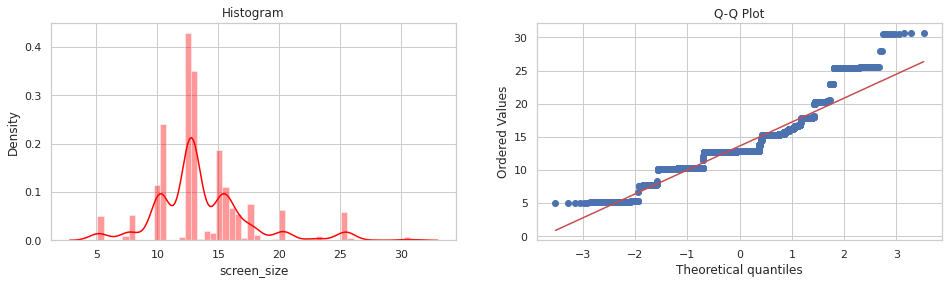

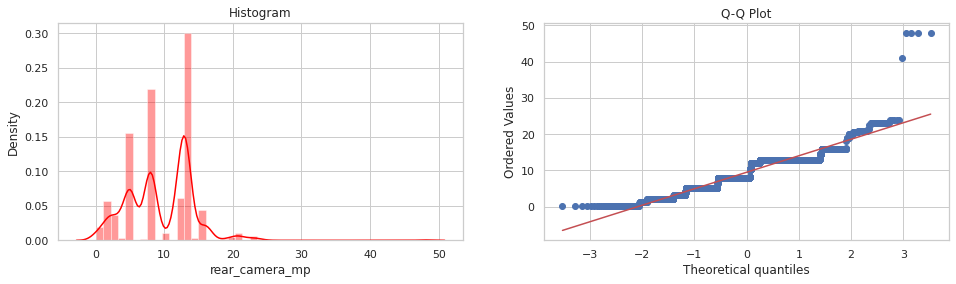

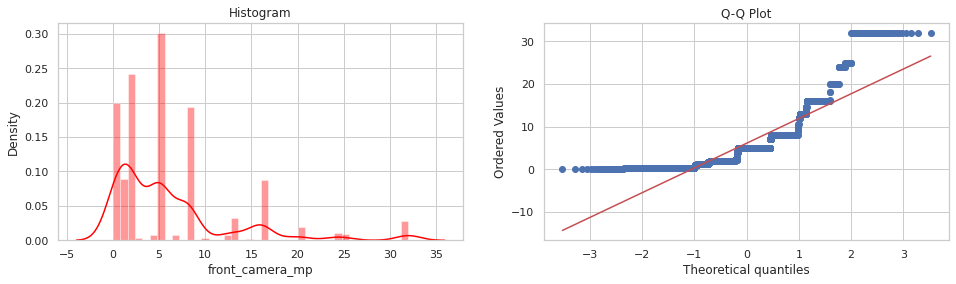

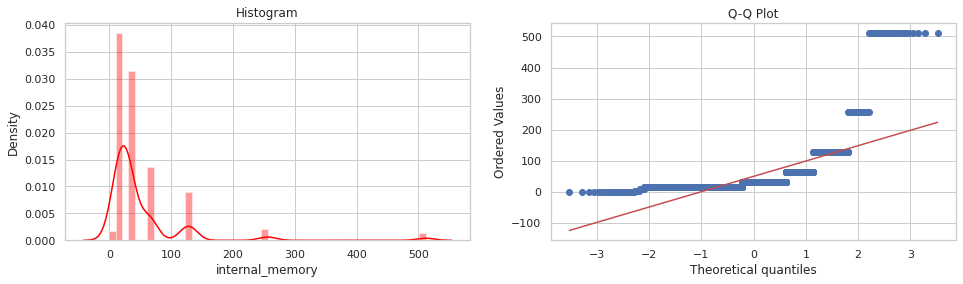

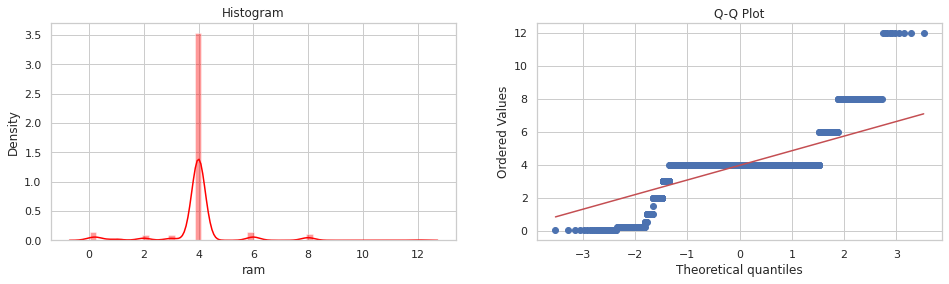

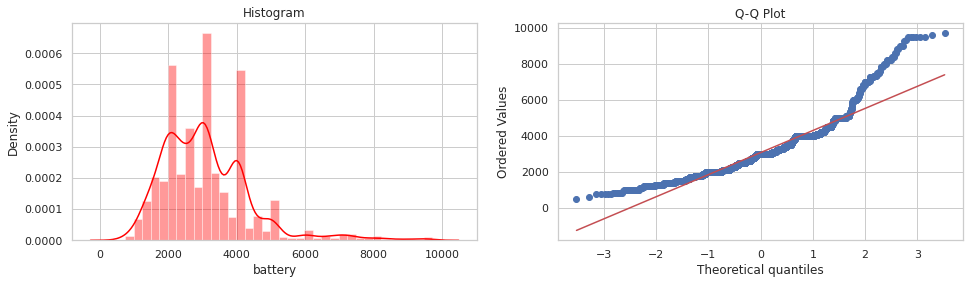

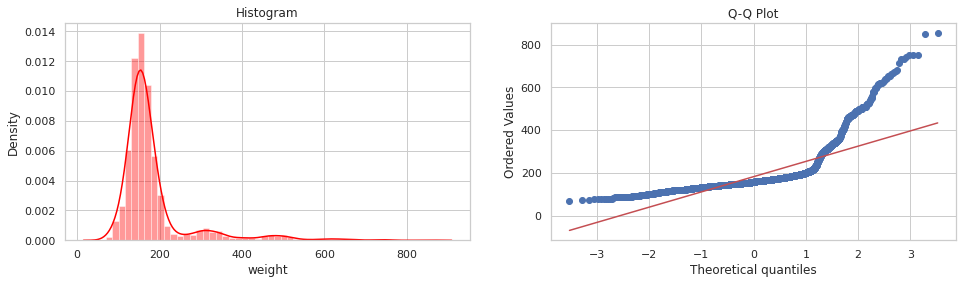

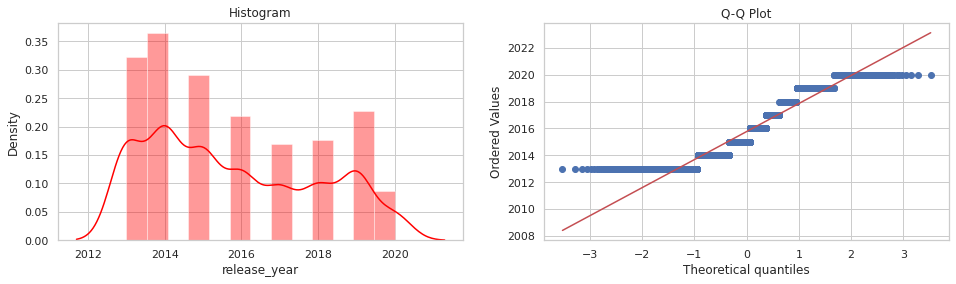

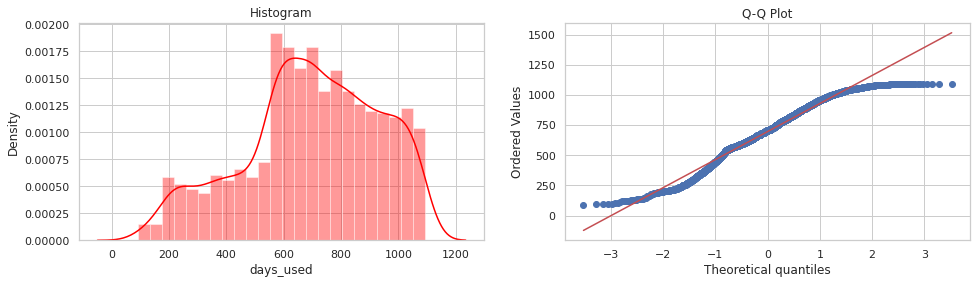

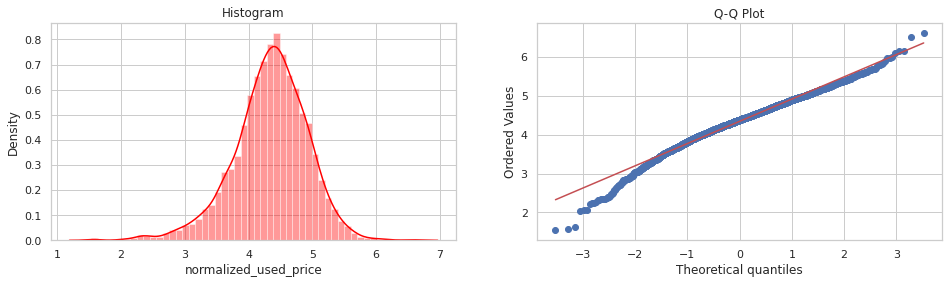

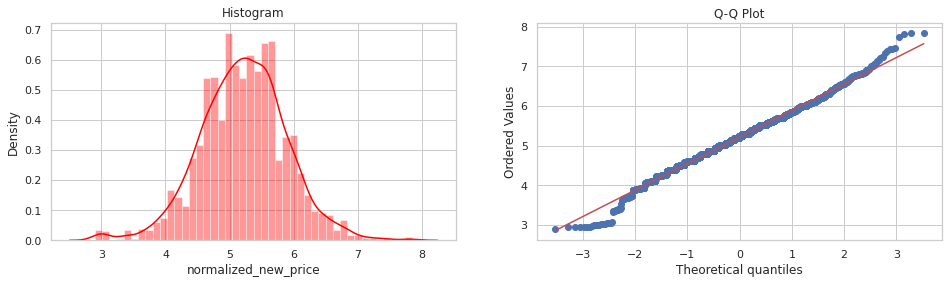

In [31]:
for feature in df[num_feature]:
  diagnostic_plot(df,feature)

In [32]:
# There are non-normal distributions in the numeric columns except in 'normalized_used_price' and 'normalized_new_price'. They should be normalized.

In [33]:
# Normalizing the data

In [34]:
# 1) Data split to training and testing data

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from scipy.stats import probplot,boxcox
from scipy.special import inv_boxcox
x=df.drop('normalized_used_price',axis=1)
y=df['normalized_used_price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# 2) Normalization

In [36]:
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [37]:
print("X_train",x_train.shape)
print("X_test",x_test.shape)
print("Y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (2596, 51)
X_test (649, 51)
Y_train (2596,)
y_test (649,)


# Machine Learning Models

In [38]:
# 1) Ridge Regression

In [40]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [41]:
ridge=Ridge()

In [43]:
parameter={'alpha':[0.5,1,2,3,4,5,10,20,30,40,50]}
ridgecv=GridSearchCV(ridge,parameter,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50]},
             scoring='neg_mean_squared_error')

In [44]:
print(ridgecv.best_params_)

{'alpha': 0.5}


In [45]:
ridge_pred=ridgecv.predict(x_test)

In [46]:
from sklearn.metrics import r2_score
rscore=r2_score(ridge_pred,y_test)

In [47]:
rscore

0.8106271210852776

In [49]:
print(f"accuracy: ridge regression model is {rscore}")

accuracy: ridge regression model is 0.8106271210852776


In [50]:
# 2) KNN Regressor

In [51]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [52]:
parameters={"n_neighbors":[1,2,3,4,5,10,20,50]}

In [54]:
knncv=GridSearchCV(knn,parameters,scoring='neg_mean_squared_error',cv=5)

knncv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 10, 20, 50]},
             scoring='neg_mean_squared_error')

In [55]:
print(knncv.best_params_)

{'n_neighbors': 4}


In [56]:
knn_pred=knncv.predict(x_test)

In [57]:
knn_score=r2_score(knn_pred,y_test)

In [58]:
knn_score

0.6455717920600956

In [59]:
# 3) Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [62]:
reg_pred=regressor.predict(x_test)

In [63]:
score=r2_score(reg_pred,y_test)

In [64]:
score

0.8122582432314497

In [65]:
# 4) Decision Tree Regressor

In [66]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()

In [67]:
parameters={'max_depth': [11],#default : none
 'max_features': ['sqrt'],#default : none
 'max_leaf_nodes': [70],#default : none
 'min_samples_leaf': [5],#default : 1
 'min_weight_fraction_leaf': [0.1],#default : 0
 'splitter': ['best']}#default : 'best'

In [69]:
tunning_model=GridSearchCV(tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
tunning_model.fit(x_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.153 total time=   0.0s
[CV 2/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.153 total time=   0.0s
[CV 3/3] END max_depth=11, max_features=sqrt, max_leaf_nodes=70, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.181 total time=   0.0s


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [11], 'max_features': ['sqrt'],
                         'max_leaf_nodes': [70], 'min_samples_leaf': [5],
                         'min_weight_fraction_leaf': [0.1],
                         'splitter': ['best']},
             scoring='neg_mean_squared_error', verbose=3)

In [71]:
tuning_pred=tunning_model.predict(x_test)

In [72]:
treescore=r2_score(knn_pred,y_test)

In [73]:
treescore

0.6455717920600956

In [74]:
# 5) Lasso Regression

In [75]:
from sklearn.linear_model import Lasso

In [76]:
lasso=Lasso()

In [77]:
parameter={'alpha':[0.01,0.001,0.0001,0.5,1]}
lassocv=GridSearchCV(lasso,parameter,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.001, 0.0001, 0.5, 1]},
             scoring='neg_mean_squared_error')

In [78]:
print(lassocv.best_params_)

{'alpha': 0.0001}


In [79]:
lasso_pred=lassocv.predict(x_test)

In [80]:
lsscore=r2_score(lasso_pred,y_test)

In [81]:
lsscore

0.81227191463516

In [82]:
# RandomForestRegressor

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
rf=RandomForestRegressor()

In [85]:
n_estimators = [5,20,50,100]#default=100 # number of trees in the random forest
max_features = ['auto', 'sqrt']#default=1.0 # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # default=none # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # default=2 # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] #default=1 # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] #default=true # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [86]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [87]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [88]:
y_predrf=rf_random.predict(x_test)

In [89]:
rfscore=r2_score(y_predrf,y_test)

In [90]:
print(rfscore)

0.8338121882972169


Compare 6 models by R2

In [91]:
plt.style.use('seaborn-darkgrid')

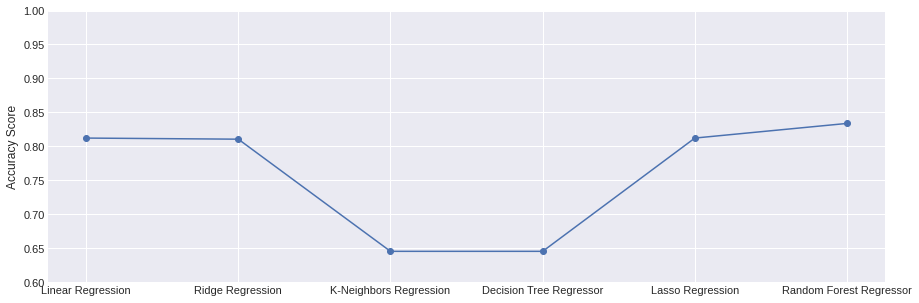

In [93]:
plt.figure(figsize=(15,5))
models = ['Linear Regression', 'Ridge Regression','K-Neighbors Regression','Decision Tree Regressor','Lasso Regression',"Random Forest Regressor"]
test_accuracy=[score,rscore,knn_score,treescore,lsscore,rfscore]
plt.plot(models,test_accuracy,'-o')
plt.ylim(0.60,1.0)
plt.ylabel("Accuracy Score")
plt.show()

In [94]:
# Random forest Model Selected as best Model for the Used mobile Phone price Prediction